In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


In [ ]:
# Load the dataset
df = pd.read_csv(r'C:\Users\91930\Desktop\quality\TechBlitz DataScience Dataset.csv')

In [22]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [23]:
# Handle missing values
df = df.dropna()

In [24]:
# Ensure column names are correctly formatted
df.columns = df.columns.str.strip()

In [25]:
# Encode categorical target variable if column exists
if 'Air Quality' in df.columns:
    label_encoder = LabelEncoder()
    df['Air Quality'] = label_encoder.fit_transform(df['Air Quality'])
else:
    raise KeyError("Error: 'Air Quality' column not found in dataset.")

In [26]:
# Define features and target
X = df.drop(columns=['Air Quality'])
y = df['Air Quality']

In [27]:
# Normalize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Define the XGBoost model with optimized hyperparameters
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42
)

In [30]:
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [31]:
# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9510
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.89      0.83      0.86       100
    Moderate       0.96      0.97      0.96       300
        Poor       0.87      0.89      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.93      1000
weighted avg       0.95      0.95      0.95      1000



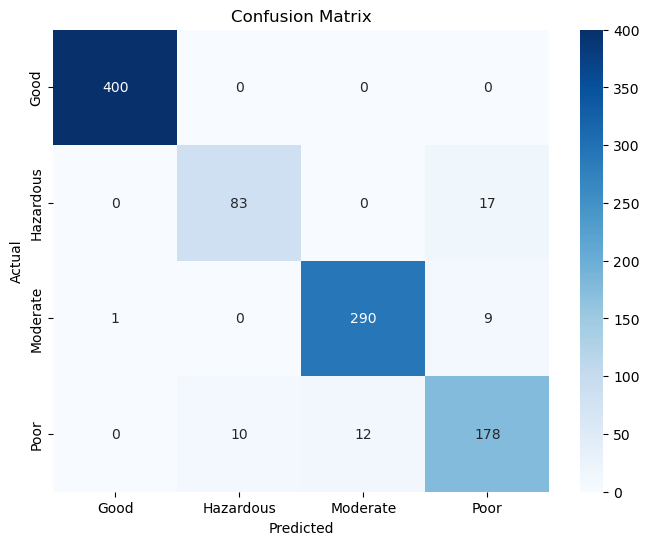

In [33]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1000x600 with 0 Axes>

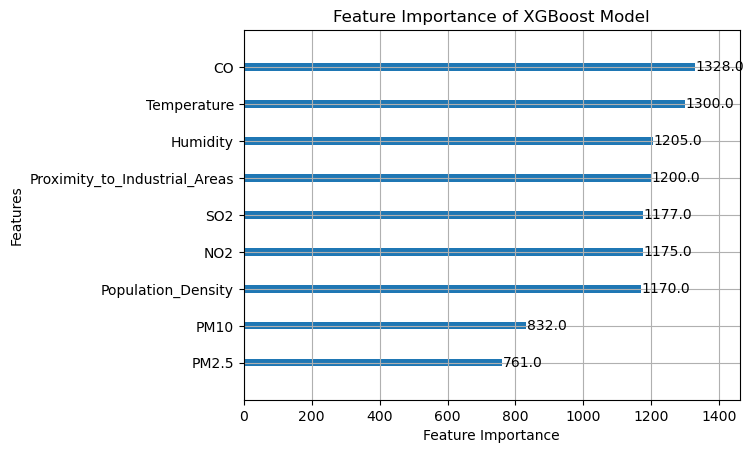

In [34]:
# Feature importance
plt.figure(figsize=(10,6))
xgb.plot_importance(model, importance_type='weight', xlabel='Feature Importance')
plt.title('Feature Importance of XGBoost Model')
plt.show()


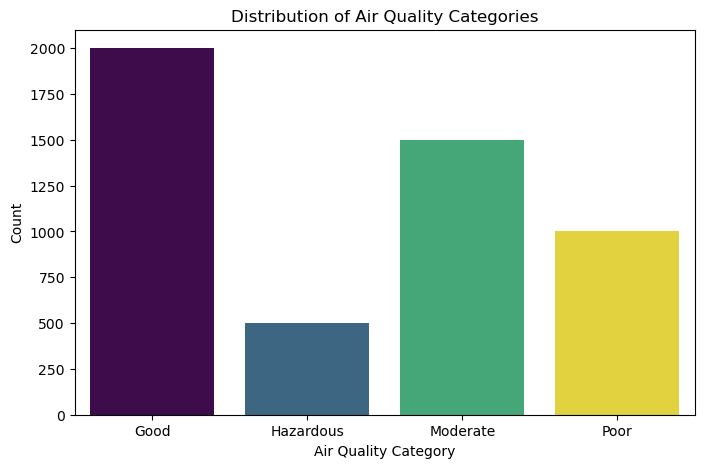

In [56]:
# Distribution of Air Quality Categories
plt.figure(figsize=(8,5))
sns.countplot(x=df['Air Quality'], hue=df['Air Quality'], palette='viridis', legend=False)
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.xlabel('Air Quality Category')
plt.ylabel('Count')
plt.title('Distribution of Air Quality Categories')
plt.show()

In [ ]:
# Save the trained model, scaler, and encoder
with open("C:\Users\91930\Desktop\quality\xgboost_air_quality.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
with open("label_encoder.pkl", "wb") as encoder_file:
    pickle.dump(label_encoder, encoder_file)
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)